In [1]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import scipy.io as io
import cv2

import base64
from io import BytesIO
from PIL import Image

import h5py

from tools.hsi_to_rgb import hsi_to_rgb


In [31]:
def np_normalize(array):
    return (array-np.min(array)) /(np.max(array) - np.min(array))

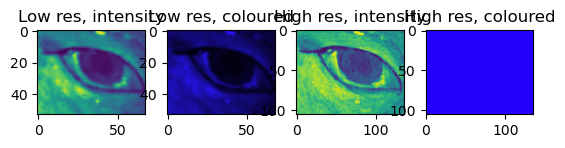

In [34]:
tmp = io.loadmat(r"C:\Users\frcar\Desktop\Git Projects\R-PNN-main\aviva_eye_aligned_copy.mat")

wl_cal = np.squeeze(tmp["Wavelengths"].astype("float32"))

ms = tmp["I_MS_LR"].astype("float32")
ms = np_normalize(ms)

hr_img = tmp["I_PAN"].astype("float32")
hr_img = np_normalize(hr_img)

tmp = io.loadmat(r"Outputs\R-PNN\20250612_112930\aviva_eye_aligned_copy_R-PNN.mat")
pansharpened = tmp["I_MS"].astype("float32")

lr_img = np.sum(ms,2) # grayscale lr image, float32

# color the ms image
rgb = hsi_to_rgb(ms, wl_cal)
rgb_hr = hsi_to_rgb(pansharpened, wl_cal)

fig, ax = plt.subplots(1,4)
ax[0].imshow(lr_img)
ax[0].set_title("Low res, intensity");
ax[1].imshow(rgb)
ax[1].set_title("Low res, coloured");
ax[2].imshow(hr_img)
ax[2].set_title("High res, intensity");
ax[3].imshow(rgb_hr)
ax[3].set_title("High res, coloured");

In [4]:
tmp = io.loadmat(r"C:\Users\frcar\Desktop\Git Projects\R-PNN-main\Outputs\R-PNN\aviva_eye_aligned_R-PNN_stats.mat")
tmp.keys()

dict_keys(['__header__', '__version__', '__globals__', 'loss_spec', 'loss_struct'])

(1, 8255)


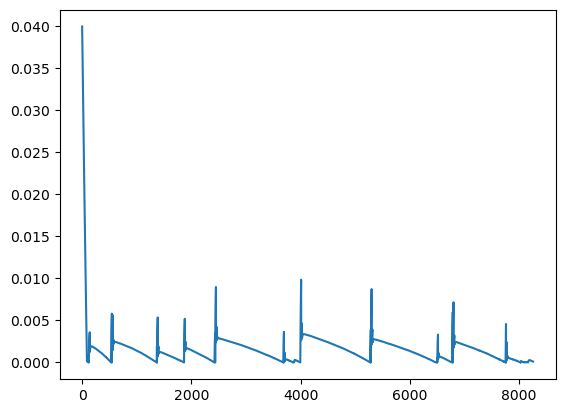

In [13]:
# fig, axs = plt.subplots()
# axs.plot(tmp["loss_spec"])
# axs.plot(tmp["loss_struct"])
# plt.show()
print(tmp["loss_spec"].shape)
plt.plot(tmp["loss_spec"].T)
plt.show()

In [8]:
list(tmp["loss_struct"])

[array([0.74614895, 0.74692823, 0.74527825, ..., 0.11597057, 0.11604369,
        0.11581591], shape=(8255,))]

In [35]:

tmp = io.loadmat(r"C:\Users\frcar\Desktop\Git Projects\R-PNN-main\aviva_eye_aligned.mat")
print(tmp.keys())

dict_keys(['__header__', '__version__', '__globals__', 'I_MS', 'I_MS_LR', 'I_PAN', 'Wavelengths'])


In [36]:
tmp["Wavelengths"].shape

(550, 1)

In [38]:
# io.savemat("aviva_eye_aligned_copy.mat", )
I_MS = tmp["I_MS"][:,:, ::10]
Wavelengths = tmp["Wavelengths"][::10]
I_MS_LR = tmp["I_MS_LR"][:,:, ::10]
I_PAN = tmp["I_PAN"]

print(I_MS.shape)
print(I_MS_LR.shape)
print(I_PAN.shape)
print(Wavelengths.shape)

(106, 136, 55)
(53, 68, 55)
(106, 136)
(55, 1)


# Stack Builder

In [ ]:

# composed 
# C:\Users\frcar\Desktop\Git Projects\Aviva analysis\R-PNN-main\aviva_eye_aligned_copy.mat #! I_MS_LR: 53,68,55, I_PAN: 106,136 ALIGNED [Reduced num of wavelengths]
# C:\Users\frcar\Desktop\Git Projects\Aviva analysis\R-PNN-main\aviva_eye_aligned.mat #! I_MS_LR: 53,68,550, I_PAN: 106,136 aligned
# C:\Users\frcar\Desktop\Git Projects\Aviva analysis\Aviva_eye_test_r2.mat #! I_MS_LR: 60,80,551 (only vis wavelengths), I_PAN: 120,160 NOT aligned [missing the WL calib]
# C:\Users\frcar\Desktop\Git Projects\Aviva analysis\Aviva_eye_test.mat #! I_MS_LR: 60,80,1156, I_PAN: 651,963, NOT aligned [missing the WL calib]

# TWINS
# "C:\Users\frcar\Desktop\Git Projects\Aviva analysis\Aviva - spatial fusion - HSI datasets collected with TWINS\Aviva_macro_Pol_0_denoised_thr0.4_199SVs_hyp_ReflectivityMap_forColorDisplay.mat" #! no clue what it is
# "C:\Users\frcar\Desktop\Git Projects\Aviva analysis\Aviva - spatial fusion - HSI datasets collected with TWINS\Aviva_macro_Pol_2_denoised_thr0.4_199SVs_hyp_ReflectivityMap_forColorDisplay.mat" #! no clue what it is
# "C:\Users\frcar\Desktop\Git Projects\Aviva analysis\Aviva - spatial fusion - HSI datasets collected with TWINS\Aviva_Pol_0_denoised_thr0.42_500SVs_hyp_ReflectivityMap_forColorDisplay.mat" #! whole image, but with artifacts

# IRIS BRUKER
# "C:\Users\frcar\Desktop\Git Projects\Aviva analysis\Aviva - spatial fusion - HSI datasets collected with IRIS BRUKER\XGLAB_VISdatacube_AVIVA_complete_1mm.mat" #! entire image, 1156 wavelengths
# "C:\Users\frcar\Desktop\Git Projects\Aviva analysis\Aviva - spatial fusion - HSI datasets collected with IRIS BRUKER\XGLAB_VISdatacube_AvivaFace_1mm.mat" #! focus on face
# "C:\Users\frcar\Desktop\Git Projects\Aviva analysis\Aviva - spatial fusion - HSI datasets collected with IRIS BRUKER\XGLAB_VISdatacube_Avivaface_03mm.mat" #! focus on face, higher res
# "C:\Users\frcar\Desktop\Git Projects\Aviva analysis\Aviva - spatial fusion - HSI datasets collected with IRIS BRUKER\XGLAB_VISdatacube_BlueCloth_03mm.mat"

# /home/north-linux/Git Projects Francesco/Aviva analysis/R-PNN-main/Outputs/R-PNN/aviva_eye_aligned_copy_R-PNN.mat

# Outputs/R-PNN/20250618_142001/aviva_eye_aligned_rwl_R-PNN.mat

matfile = io.loadmat(r"/home/north-linux/Git Projects Francesco/Aviva analysis/R-PNN-main/Outputs/R-PNN/20250612_143239/aviva_eye_aligned_copy_R-PNN.mat")
print(matfile.keys())

dict_keys(['__header__', '__version__', '__globals__', 'I_MS'])


In [10]:
print(matfile["I_MS"].shape)
rgb = np.sum(matfile["I_MS"],1).squeeze()
print(rgb.shape)


(1, 55, 106, 136)
(106, 136)


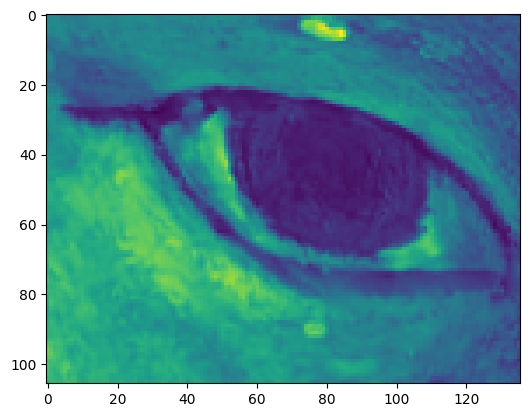

In [11]:
fig, axs = plt.subplots(1)
# rgb = hsi_to_rgb(matfile["data"], matfile["WL"].squeeze())
# axs.imshow(np.sum(matfile["data"], 2))
rgb = np.sum(matfile["I_MS"],1).squeeze()
axs.imshow(rgb)
plt.show()

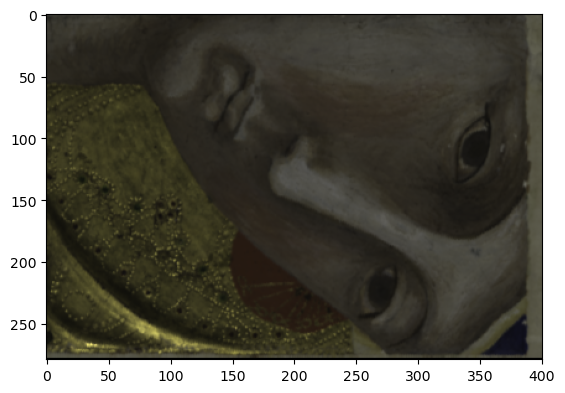

In [ ]:
fig, axs = plt.subplots(1)
# rgb = hsi_to_rgb(matfile["data"], matfile["WL"].squeeze())
# axs.imshow(np.sum(matfile["data"], 2))
rgb = np.sum(matfile["I_MS"],2)
axs.imshow(rgb)
plt.show()

In [40]:
print(matfile["Wavelengths"].shape)
print(matfile["I_MS_LR"].shape)
print(matfile["I_PAN"].shape)


(55, 1)
(53, 68, 55)
(106, 136)


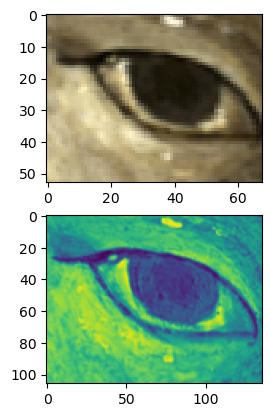

In [ ]:
fig, axs = plt.subplots(2)
rgb = hsi_to_rgb(matfile["I_MS_LR"], matfile["Wavelengths"].squeeze())
# axs.imshow(np.sum(matfile["data"], 2))
axs[0].imshow(rgb)
axs[1].imshow(matfile["I_PAN"])
plt.show()

In [10]:
matfile["WL"].shape

(1156, 1)

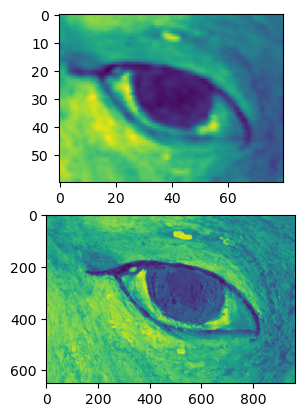

In [8]:
fig, axs = plt.subplots(2) 
I_MS_LR = np.sum(matfile["I_MS_LR"], 2)
axs[0].imshow(I_MS_LR)
axs[1].imshow(matfile["I_PAN"])
plt.show()

In [9]:
%matplotlib qt
fig, axs = plt.subplots(1)
axs.imshow(matfile["I_PAN"])
plt.show()

In [14]:
print(matfile["I_MS_LR"].shape)

print(matfile["I_PAN"].shape)

(60, 80, 1156)
(651, 963)


In [2]:
tmp = io.loadmat(r"Datasets/aviva_face_aligned_r6_rwl.mat")
print(tmp.keys())

dict_keys(['__header__', '__version__', '__globals__', 'I_MS', 'I_MS_LR', 'I_PAN', 'Wavelengths'])


In [3]:
tmp["I_MS_LR"].shape

(263, 246, 12)

In [10]:
mat_stats = io.loadmat(r"Outputs/R-PNN/20250704_134316/aviva_eye_aligned_r6_rwl_R-PNN_stats.mat")
print(mat_stats.keys())

dict_keys(['__header__', '__version__', '__globals__', 'loss_spec', 'loss_struct'])


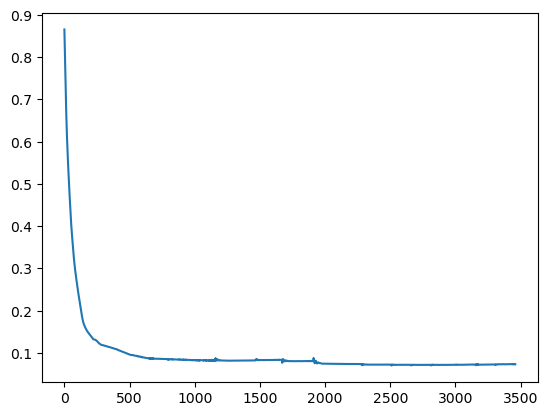

In [11]:
loss_spec = mat_stats["loss_spec"].squeeze()
loss_struct = np.squeeze(mat_stats["loss_struct"])
loss = loss_spec + loss_struct

axs = plt.plot(loss)
plt.show()


In [12]:
matfile = io.loadmat(r"Datasets/aviva_eye_aligned_r6.mat")
print(matfile.keys())

dict_keys(['__header__', '__version__', '__globals__', 'I_MS', 'I_MS_LR', 'I_PAN', 'Wavelengths'])


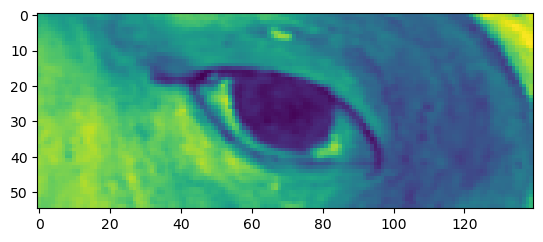

In [13]:
axs = np.sum(matfile["I_MS_LR"],2)
plt.imshow(axs)

In [14]:
matfile["Wavelengths"].shape

(1, 1156)

In [15]:
I_MS_LR = matfile["I_MS_LR"]
I_PAN = matfile["I_PAN"]
Wavelengths = matfile["Wavelengths"]

In [16]:
# Now transform all the bands in the HS image and build the stack
height = I_PAN.shape[0]
width = I_PAN.shape[1]
nbands = Wavelengths.shape[1]
# stack will have the height and width of the largest rectangle found with the appropriate function 
stack = np.zeros((height, width, nbands)) # as many bands as original HS +1 for PAN
for i in range(nbands): # for every band/wavelength
    ms_up = cv2.resize(I_MS_LR[:,:,i], (I_PAN.shape[1], I_PAN.shape[0]), interpolation=cv2.INTER_CUBIC)
    stack[:,:,i] = ms_up 


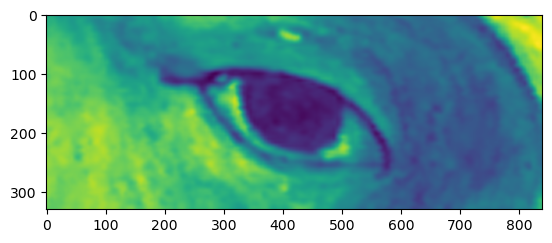

In [17]:
axs = np.sum(stack,2)
plt.imshow(axs)

In [2]:
import os
I_MS = stack


mat_dict = {
    "I_MS": I_MS,
    "I_MS_LR": I_MS_LR,
    "I_PAN": I_PAN,
    "Wavelengths": Wavelengths
}

title = "aviva_eye_aligned_r6_cubic.mat"
savepath = os.path.join("Datasets", title)
print(savepath)

NameError: name 'stack' is not defined

In [19]:
io.savemat(savepath, mat_dict)

In [17]:
matfile = io.loadmat(r"Datasets/aviva_face_aligned_r6_rwl.mat")
print(matfile.keys())

AttributeError: loadmat

In [9]:
print(matfile["I_MS"].shape)

(1574, 1476, 12)


# Save file as h5

In [ ]:
import h5py
matfile = io.loadmat(r"aviva_eye_aligned_r6_cubic.mat")

Observe the results with gaussian degradation

In [26]:
import cv2
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt


In [38]:
matfile = io.loadmat(r"Datasets/UB7_2A_x785_250mA_550x_500y_10um_1s_SUPER-RES.mat")
print(matfile.keys())

dict_keys(['__header__', '__version__', '__globals__', 'I_MS_LR', 'I_PAN', 'Wavelengths'])


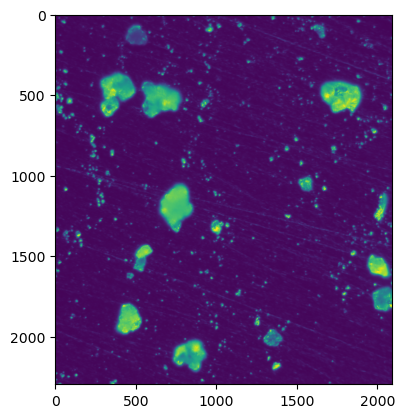

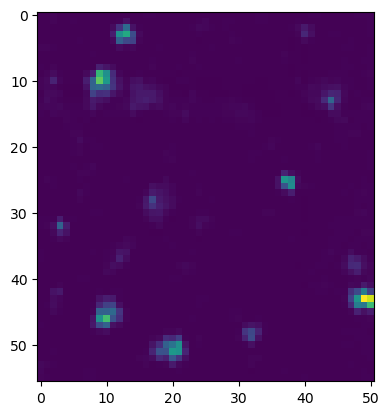

In [29]:
fig, axs = plt.subplots()
axs.imshow(matfile["I_PAN"])

fig1, axs1 = plt.subplots()
axs1.imshow(np.sum(matfile["I_MS_LR"], 2))

In [31]:
ratio = 6
width_lr = matfile["I_MS_LR"].shape[1]
height_lr = matfile["I_MS_LR"].shape[0]
height = ratio*height_lr 
width = ratio * width_lr
newpan = cv2.resize(matfile["I_PAN"], (width, height))
print(newpan.shape)

(336, 306)


In [33]:
# form the new matfile
hs = matfile["I_MS_LR"]


# Normalize the HS across band, NOT every band separately
def np_normalize(array):
    return (array-np.min(array)) /(np.max(array) - np.min(array))

#hs = hs[:,:,::100]
# stack will have the height and width of the largest rectangle found with the appropriate function 
stack = np.zeros((height, width, hs.shape[2]+1)) # as many bands as original HS +1 for PAN
for i in range(hs.shape[2]): # for every band/wavelength
    hs_up = cv2.resize(hs[:,:,i], (ratio*hs.shape[1], ratio*hs.shape[0]), interpolation=cv2.INTER_CUBIC)
    stack[:,:,i] = hs_up  # select only the rectangle 
stack[:,:,:-1] = np_normalize(stack[:,:,:-1])
stack[:,:,-1] = np_normalize(newpan.astype("uint16")) # the last layer is the aligned and cropped pan

# ground truth
# gt = np_normalize(stack[::ratio,::ratio,:-1]) # <- these are the exact pixels surviving the masking, except the last layer, which is the pan
gt = np_normalize(matfile["I_MS_LR"])


In [36]:
mat_dict = {
    "I_MS": stack[:, :, :-1],
    "I_MS_LR": gt[:, :, :],
    "I_PAN": stack[:, :, -1],
    "Wavelengths": matfile["Wavelengths"]
}
title = "UB7_RAMAN_Alessia.mat"
savepath = os.path.join("Datasets", title)
print(savepath)


Datasets/UB7_RAMAN_Alessia.mat


In [37]:
io.savemat(savepath, mat_dict)

In [39]:
matfile = io.loadmat(r"Outputs/R-PNN/20250708_152804/UB7_RAMAN_Alessia_R-PNN.mat")
print(matfile.keys())

dict_keys(['__header__', '__version__', '__globals__', 'I_MS'])


In [47]:
import sklearn
from sklearn.decomposition import NMF

In [65]:
matfile = io.loadmat(r"Outputs/R-PNN/20250704_171449/aviva_eye_aligned_r6_cubic_R-PNN.mat")
print(matfile.keys())

dict_keys(['__header__', '__version__', '__globals__', 'I_MS'])


In [54]:
model = NMF(n_components=10, max_iter = 10000)

X = np.transpose(np.squeeze(matfile["I_MS"]), (1,2,0))
X = np_normalize(X)
ch = X.shape[2]
X = X.reshape(-1,ch )
W = model.fit_transform(X)
H = model.components_


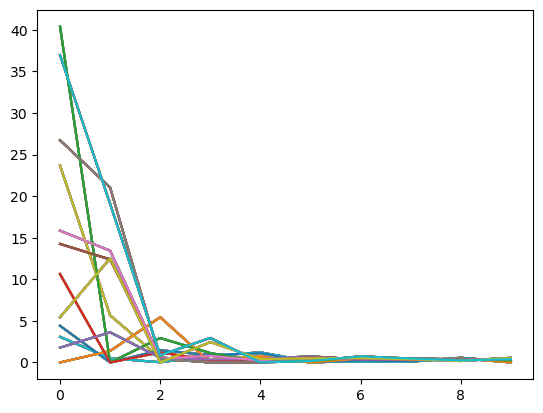

In [58]:
fig, axs = plt.subplots()
for i in range(10):
    axs.plot(H)

plt.show()


In [ ]:
for i in range(10):
    

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

def spectral_angle(a, b):
    """Compute spectral angle between two vectors a and b."""
    # Ensure inputs are 2D (n_pixels, n_channels)
    numerator = np.sum(a * b, axis=-1)
    denom = np.linalg.norm(a, axis=-1) * np.linalg.norm(b, axis=-1)
    # Clip to avoid numerical errors
    cosine = np.clip(numerator / (denom + 1e-12), -1, 1)
    return np.arccos(cosine)  # in radians

def visualize_matches(hsi_cube, W, H, threshold_rad=0.1, colors=None):
    h, w, c = hsi_cube.shape
    data = hsi_cube.reshape(-1, c)  # (n_pixels, channels)
    n_endmembers = H.shape[0]

    rgb_mask = np.zeros((h * w, 3))

    if colors is None:
        # Truncate to RGB
        colors = [c[:3] for c in plt.cm.get_cmap('tab10', n_endmembers).colors]

    for i in range(n_endmembers):
        em = H[i]
        em = em / np.linalg.norm(em)
        angles = spectral_angle(data, em)
        matched_pixels = angles < threshold_rad

        if matched_pixels.any():
            rgb_mask[matched_pixels] = colors[i]

    rgb_mask = rgb_mask.reshape(h, w, 3)
    plt.imshow(rgb_mask)
    plt.title(f"Pixels matched within {threshold_rad:.3f} rad of any endmember")
    plt.axis('off')
    plt.show()



In [ ]:

# === Load and preprocess ===
from scipy.io import loadmat
# replace with your actual file path

# Extract and reshape the HSI
X = np.transpose(np.squeeze(matfile["I_MS"]), (1, 2, 0))  # shape (H, W, C)
X = np_normalize(X)
H_img, W_img, C = X.shape

# Normalize each spectrum (L2 norm)
X_flat = X.reshape(-1, C)
X_flat /= np.linalg.norm(X_flat, axis=1, keepdims=True) + 1e-12

# === Perform NMF ===
model = NMF(n_components=10, max_iter=10000, init='nndsvda')
W_nmf = model.fit_transform(X_flat)
H_nmf = model.components_  # shape (n_components, C)


In [64]:

# === Visualize matched pixels ===
visualize_matches(X, W_nmf, H_nmf[:,0], threshold_rad=0.2)


/tmp/ipykernel_62109/3887356191.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = [c[:3] for c in plt.cm.get_cmap('tab10', n_endmembers).colors]


AxisError: axis -1 is out of bounds for array of dimension 0

In [11]:
from tools.hysime import *
import scipy.io as io
from tools.hsi_to_rgb import hsi_to_rgb
import matplotlib.pyplot as plt


In [ ]:

matfile = io.loadmat(r"Datasets/aviva_eye_aligned_r6_cubic.mat")
print(matfile.keys())


In [2]:
wl_cal = matfile["Wavelengths"].squeeze()

In [3]:
I_MS_LR = matfile["I_MS_LR"]

h = I_MS_LR.shape[0]
w = I_MS_LR.shape[1]

I_MS_LR = I_MS_LR.reshape(h*w,-1)
n, Rn = est_noise(I_MS_LR) 

kf, Ek = hysime(I_MS_LR,n,Rn)


In [4]:
# recover noise free data
x_hat =Ek @ (Ek.T @ I_MS_LR.T)
x_hat = x_hat.T

In [7]:
err_l2 = np.linalg.norm(x_hat - I_MS_LR,ord = 2)
print(err_l2)

0.23260156456761666


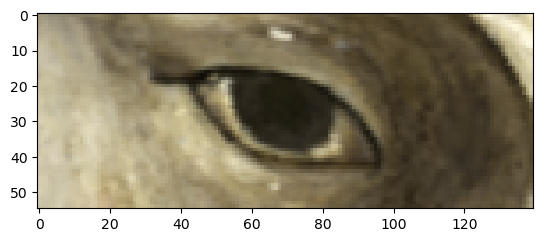

In [ ]:


x_rgb = hsi_to_rgb(x_hat, wl_cal)
x_rgb = x_rgb.reshape(h,w,-1)
plt.imshow(x_rgb)


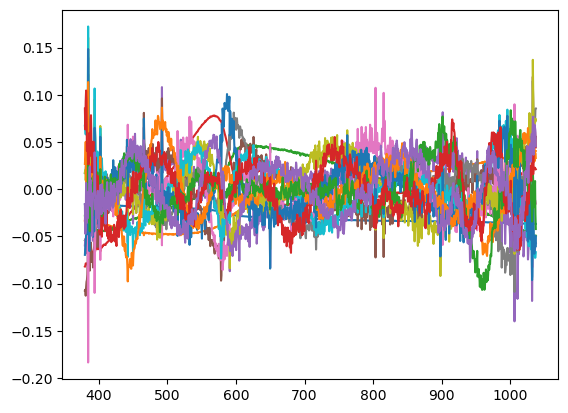

In [25]:
for i in range(15):
    plt.plot(wl_cal, Ek[:,i])

In [8]:
from scipy.signal import savgol_filter

def estimate_snr_via_smoothing(y, window_length=11, polyorder=3):
    y_smooth = savgol_filter(y, window_length, polyorder)
    signal_power = np.sum(y_smooth ** 2)
    noise_power = np.sum((y - y_smooth) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

snr_list = []
for i in range(Ek.shape[1]):
    snr_list.append(estimate_snr_via_smoothing(Ek[:,i]))

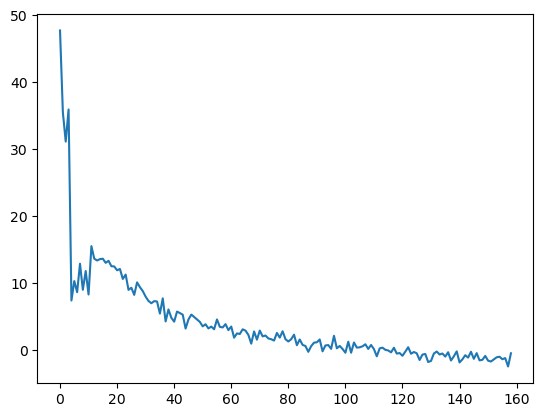

In [12]:
plt.plot(snr_list)

Let's clean the dataset

In [14]:
import scipy.io as io
import numpy
from scipy.signal import savgol_filter
from scipy.ndimage import median_filter

In [22]:
matfile = io.loadmat(r"Datasets/aviva_nose_aligned_r6_all_wl.mat")
print(matfile.keys())


dict_keys(['__header__', '__version__', '__globals__', 'I_MS_LR', 'I_PAN', 'Wavelengths'])


In [23]:
imslr =  matfile["I_MS_LR"]
wl_cal = matfile["Wavelengths"].squeeze()

imslr = median_filter(imslr, size = (1,1,3))
imslr = savgol_filter(imslr, window_length=9, polyorder=2)

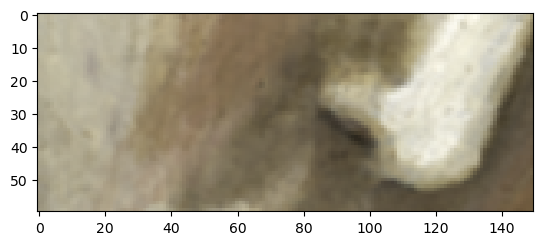

In [24]:
img_rgb = hsi_to_rgb(imslr, wl_cal)
plt.imshow(img_rgb)

In [25]:
import scipy.io as io

matout = {
    "I_MS_LR": imslr,
    "Wavelengths": wl_cal,
    "I_PAN": matfile["I_PAN"],
}

filepath = "Datasets/aviva_nose_aligned_r6_filtered.mat"
io.savemat(filepath, matout)

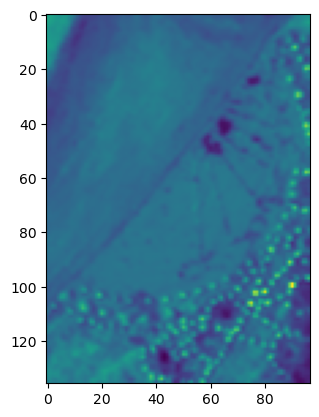

In [26]:
matfile = io.loadmat(r"Datasets/aviva_earring_aligned_r6_all_wl.mat")
imslr = matfile["I_MS_LR"]
plt.imshow(np.sum(imslr,2))